## Task 1

На сайте запущен А/В тест с целью увеличить доход. В приложенном excel файле вы найдете сырые данные по результатам эксперимента – user_id, тип выборки variant_name и доход принесенный пользователем revenue.
Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.

In [345]:
from scipy.stats import ttest_1samp, mannwhitneyu, ttest_ind, shapiro, kstest
import numpy as np

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [346]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [347]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1IGMgJP_XqQwA6h_w1KYG7TQJhS15h4c4',
                                    dest_path='./AB_Test_Results.xlsx')

In [386]:
df = pd.read_excel('AB_Test_Results.xlsx')
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [388]:
df.USER_ID = df.USER_ID.astype('uint16')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  uint16 
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), object(1), uint16(1)
memory usage: 175.9+ KB


In [389]:
df.isna().sum()

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

In [390]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [391]:
df = df.groupby(['USER_ID', 'VARIANT_NAME'], as_index=False).agg({'REVENUE': 'sum'})

In [392]:
df1 = df.query('REVENUE > 0 and VARIANT_NAME == "control"')
df1.head()

,USER_ID,VARIANT_NAME,REVENUE
89,124,control,1.25
125,169,control,4.33
211,282,control,18.56
374,487,control,4.33
421,552,control,2.99


In [393]:
df2 = df.query('REVENUE > 0 and VARIANT_NAME == "variant"')
df2.head()

,USER_ID,VARIANT_NAME,REVENUE
37,56,variant,2.99
314,403,variant,1.99
345,443,variant,3.75
471,617,variant,3.98
541,702,variant,2.92


In [394]:
df1.describe()

,USER_ID,REVENUE
count,80.000000,80.000000
mean,4461.950000,8.037500
std,2826.386242,22.498124
min,124.000000,0.020000
25%,2037.500000,1.515000
50%,4327.000000,2.960000
75%,6636.750000,6.657500
max,9766.000000,196.010000


In [395]:
df2.describe()

,USER_ID,REVENUE
count,71.000000,71.000000
mean,5270.267606,4.950282
std,3123.025987,9.971103
min,56.000000,0.020000
25%,2648.000000,1.240000
50%,5597.000000,2.240000
75%,8012.500000,3.975000
max,9996.000000,58.630000


In [396]:
df1.USER_ID.nunique()

80

In [397]:
df2.USER_ID.nunique()

71

In [398]:
df1.USER_ID.count()

80

In [399]:
df2.USER_ID.count()

71

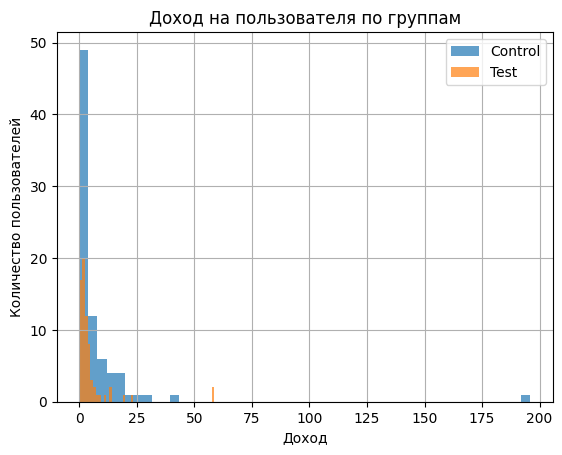

In [400]:
df1.REVENUE.hist(bins = 50, alpha = 0.7, label = 'Control')
df2.REVENUE.hist(bins = 50, alpha = 0.7, label = 'Test')
plt.title('Доход на пользователя по группам')
plt.xlabel('Доход')
plt.ylabel('Количество пользователей')
plt.legend()
plt.show();

In [401]:
# Проверка на нормальность тест Колмогорова-Смирнова
kstest(df1.REVENUE, 'norm')

KstestResult(statistic=0.7443502263331446, pvalue=3.476934093734831e-46, statistic_location=1.25, statistic_sign=-1)

In [402]:
kstest(df2.REVENUE, 'norm')

KstestResult(statistic=0.6864151686037542, pvalue=8.281070085072275e-34, statistic_location=1.0, statistic_sign=-1)

pvalue < 0.05\
Отвергаем нулевую гипотезу данные распределенны не нормально.

In [403]:
mw_stats = mannwhitneyu(x = df1.REVENUE, y = df2.REVENUE)
mw_stats

MannwhitneyuResult(statistic=3273.0, pvalue=0.10678659163407059)

In [404]:
stats.ttest_ind(df1.REVENUE, df2.REVENUE, equal_var = False)

Ttest_indResult(statistic=1.1105825827497187, pvalue=0.26913377074080375)

Статистически значимого различия эксперимент не обнаружил. Оставляем как было.